# Exercises for Hughes and Hase: Chapter 4

Python activities to complement Measurements and their Uncertainties, Chapter 4, "Error propagation." Section numbers in the book correspond to those listed below.

<-- General comments on how to use Jupyter Notebook -->

## 4.1 Propagating the error in a single-variable function

Reproduce Fig. 4.1(a). The caption says that this shows Bragg's law for a silicon single crystal. This is incorrect: silicon has a room temperature lattice constant of $a = 0.5431$ nm, which gives $\lambda = 2 a = 1.1$ nm for $\theta = \frac{\pi}{2}$, as shown in the plot. But silicon's diamond structure suppresses Bragg scattering from planes with this spacing; Bragg scattering is allowed, however, for lattice planes $d=a/\sqrt{3} = 0.3$ nm, which would give $\lambda = 2 a/\sqrt{2} = 0.63$  nm for $\theta = \frac{\pi}{2}$ . We'll ignore this oversight so that we can compare results with the book.

Text(80, 0.8, '(a)')

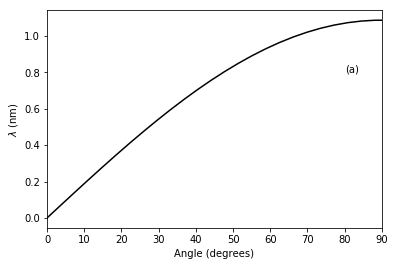

In [3]:
# import numpy library and name it "np".
import numpy as np
# import matplotlib.pyplot and name it "plt"
import matplotlib.pyplot as plt

d = 0.5431 # (nm)
theta_rad = np.linspace(0, np.pi) # Python uses radians for angles
theta_deg = np.degrees(theta_rad)

plt.plot(theta_deg, 2*d*np.sin(theta_rad), 'k-')
plt.xlabel('Angle (degrees)')
plt.xlim(0, 90)
plt.ylabel('$\lambda$ (nm)')
plt.text(80, 0.8, '(a)')

## 4.1.1 The functional approach for single-variable functions
Consider a fixed angular uncertainty of $\alpha_{\theta}=0.05^\circ$.

In [4]:
alpha_theta_deg = 0.05
alpha_theta_rad = np.deg2rad(alpha_theta_deg)

Confirm the wavelength uncertainties given in the text.

In [5]:
theta_eval_deg = np.array([15, 75])
theta_eval_rad = np.deg2rad(theta_eval_deg)

alpha_lambda = 2*d*(np.sin(theta_eval_rad + alpha_theta_rad) - np.sin(theta_eval_rad))


print(np.around(1e3 * alpha_lambda, decimals=4)) # Display in units of pm

[0.9155 0.2449]


Reproduce Fig. 4.1(b) for $\bar{\theta} = 75^{\circ}$, where the $\sin$ function is more nonlinear. 
<-- comments on how to plot in Python --> 

[75.   74.95 75.05] [1.04918863 1.0489429  1.04943356]
(1.0485114744077384, 1.0498607968568938)


[Text(0, 0, '$\\bar{\\theta}$'),
 Text(0, 0, '$\\bar{\\theta} -\\alpha_\\theta $'),
 Text(0, 0, '$\\bar{\\theta} + \\alpha_\\theta $')]

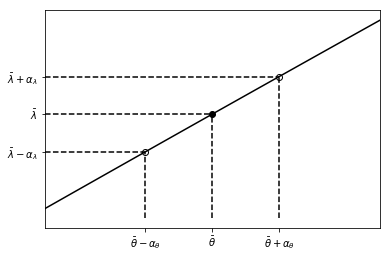

In [6]:
theta_bar_deg = theta_eval_deg[1]
theta_bar_rad = np.deg2rad(theta_bar_deg)
theta_interval_deg = theta_bar_deg+alpha_theta_deg*np.array([-1,1])
theta_interval_rad = np.deg2rad(theta_interval_deg)
theta_lim = theta_bar_deg + 2.5*alpha_theta_deg*np.array([-1,1])
theta_deg = np.linspace(theta_lim[0],theta_lim[1])
theta_rad = np.deg2rad(theta_deg)

# Plot theory curve

plt.plot(theta_deg, 2*d*np.sin(theta_rad), 'k-')
plt.xlim(theta_lim)

# Place closed marker at measurement point
plt.plot(theta_bar_deg, 2*d*np.sin(theta_bar_rad), 'ko')
# Place open markers at uncertainty limits
plt.plot(theta_interval_deg, 2*d*np.sin(theta_interval_rad), 'ko', mfc='none')

# Connect markers with axes with dashed lines
marker_position_x = np.insert(theta_interval_deg, 0, theta_bar_deg)

marker_position_y = 2*d*np.sin(np.insert(theta_interval_rad, 0, theta_bar_rad))
lambda_lim = plt.gca().get_ylim()
print(marker_position_x, marker_position_y)
print(plt.gca().get_ylim())


for i_marker in range(3):
    v_line_x = marker_position_x[i_marker]*np.array([1, 1])

    v_line_y = np.array([lambda_lim[0], marker_position_y[i_marker]])
    h_line_x = np.array([theta_lim[0], marker_position_x[i_marker]])
    h_line_y = marker_position_y[i_marker]*np.array([1, 1])

    plt.plot(h_line_x, h_line_y, 'k--', v_line_x, v_line_y, 'k--')
    
plt.gca().set_yticks(marker_position_y)
plt.gca().set_yticklabels(['$\\bar{\lambda}$', '$\\bar{\lambda} -\\alpha_\lambda $', '$\\bar{\lambda} + \\alpha_\lambda $'])

plt.gca().set_xticks(marker_position_x)
plt.gca().set_xticklabels(['$\\bar{\\theta}$', '$\\bar{\\theta} -\\alpha_\\theta $', '$\\bar{\\theta} + \\alpha_\\theta $'])



## 4.1.2 A calculus-based approximation for single-variable functions
Compare the calculus-based method with the functional approach for the Bragg's law example.

In [7]:
alpha_lambda_calc = np.abs(2*d*np.cos(theta_eval_rad)) * alpha_theta_rad

In [8]:
print('Uncertainty, functional approach (pm):')
print(np.around(1e3 * alpha_lambda, decimals=4))

Uncertainty, functional approach (pm):
[0.9155 0.2449]


In [9]:
print('Uncertainty, calculus-based approximation (pm):')
print(np.around(1e3 * alpha_lambda_calc, decimals=4))

Uncertainty, calculus-based approximation (pm):
[0.9156 0.2453]


Increase angular uncertainty by a factor of 100, from 0.05 degrees to 5 degrees, and compare again. Note that the calculus-based estimate overestimates the uncertainty because the sin function is sub-linear---that is, as the argument increases, the slope decreases.

In [10]:
alpha_theta_deg = 100 * 0.05
alpha_theta_rad = np.deg2rad(alpha_theta_deg)

alpha_lambda = 2*d*(np.sin(theta_eval_rad + alpha_theta_rad) - np.sin(theta_eval_rad))
alpha_lambda_calc = np.abs(2*d*np.cos(theta_eval_rad)) * alpha_theta_rad

In [11]:
print('Uncertainty, functional approach (pm):')
print(np.around(1e3 * alpha_lambda, decimals=4))

Uncertainty, functional approach (pm):
[90.373  20.5095]


In [12]:
print('Uncertainty, calculus-based approximation (pm):')
print(np.around(1e3 * alpha_lambda_calc, decimals=4))

Uncertainty, calculus-based approximation (pm):
[91.559  24.5332]


## 4.1.3 Look-up table for common single-variable functions
Let's continue this comparison for the functions shown in Table 4.1. Set $A = 1$ and $\alpha_A = 0.01$ , and calculate $\alpha_Z$ using both the functional approach and the calculus-based approach. It's convenient to put this in a loop, where the function changes in each iteration but otherwise the calculation is the same. 

<--- need to be modified |
We can do this using two new MATLAB programming concepts: structures and anonymous functions.

Let's start with structures , which are a way to store data of different types in a single array. We'll begin by making a structure array S that contains the function names in the field name. | --->

In [13]:
s = {'name': ['1/x', 'exp(x)', 'ln x', 'log x', 'x**n', '10**x', 'sin x', 'cos x', 'tan x']}
print(s)
print(s['name'][0])

{'name': ['1/x', 'exp(x)', 'ln x', 'log x', 'x**n', '10**x', 'sin x', 'cos x', 'tan x']}
1/x


<--- comments on Python Dictionary and lambda function ---> 

In [14]:
zFun = lambda x: 1./x
for i in range(1, 4):
    print(i, zFun(i))

1 1.0
2 0.5
3 0.3333333333333333


Now we can define new fields in s, function and derivative, that contain anonymous functions for the function and its derivative. We choose $n = 3$ for the function $Z(A) = A^n$.

In [21]:
import inspect
s['Function'] = [lambda x: 1./x, 
                 lambda x: np.exp(x), 
                 lambda x: np.log(x),
                 lambda x: np.log10(x),
                 lambda x: x**3,
                 lambda x: 10**x, 
                 lambda x: np.sin(x),
                 lambda x: np.cos(x), 
                 lambda x: np.tan(x)]

print(inspect.getsource(s['Function'][0]))

s['derivative'] = [lambda x: - 1./x**2, 
                   lambda x: np.exp(x), 
                   lambda x: 1./x,
                   lambda x: 1./(np.log(10)*x),
                   lambda x: 3*x**2,
                   lambda x: 10**x*np.log(10), 
                   lambda x: np.cos(x),
                   lambda x: - np.sin(x), 
                   lambda x: 1 + np.tan(x)**2]

print(s['Function'][0](2))

s['Function'] = [lambda x: 1./x, 
                 lambda x: np.exp(x), 
                 lambda x: np.log(x),
                 lambda x: np.log10(x),
                 lambda x: x**3,
                 lambda x: 10**x, 
                 lambda x: np.sin(x),
                 lambda x: np.cos(x), 
                 lambda x: np.tan(x)]

0.5


The dictionary now has three fields, and two of the fields contain anonymous functions. Each field conatians a list of nine elements. 

In [22]:
print(s.keys())

dict_keys(['name', 'Function', 'derivative'])


In [23]:
import inspect
print(inspect.getsource(s['Function'][0]))
print(inspect.getsource(s['derivative'][0]))

s['Function'] = [lambda x: 1./x, 
                 lambda x: np.exp(x), 
                 lambda x: np.log(x),
                 lambda x: np.log10(x),
                 lambda x: x**3,
                 lambda x: 10**x, 
                 lambda x: np.sin(x),
                 lambda x: np.cos(x), 
                 lambda x: np.tan(x)]

s['derivative'] = [lambda x: - 1./x**2, 
                   lambda x: np.exp(x), 
                   lambda x: 1./x,
                   lambda x: 1./(np.log(10)*x),
                   lambda x: 3*x**2,
                   lambda x: 10**x*np.log(10), 
                   lambda x: np.cos(x),
                   lambda x: - np.sin(x), 
                   lambda x: 1 + np.tan(x)**2]



Now we can loop over the elements of the dictionary s to compare the functional and calculus-based approaches to error propagation methods. 
<--- comments on how to fomat print function --->

In [29]:
a = 1
alpha_a = 0.01
print('a = {0:.4f}, da = {1:.4f} \n'.format(a, alpha_a))
print('Z(A) \t Z(A+dA)-Z(A) \t |dZ/dA|alphaA\n')

for i_z in range(len(s['name'])):

    alpha_z_fun = np.abs(s['Function'][i_z](a + alpha_a) - s['Function'][i_z](a))
    alpha_z_cal = abs(s['derivative'][i_z](a) * alpha_a)
    print('{0:s} \t {1:9.6f} \t {2:9.6f} \t'.format(s['name'][i_z], alpha_z_fun, alpha_z_cal))

a = 1.0000, da = 0.0100 

Z(A) 	 Z(A+dA)-Z(A) 	 |dZ/dA|alphaA

1/x 	  0.009901 	  0.010000 	
exp(x) 	  0.027319 	  0.027183 	
ln x 	  0.009950 	  0.010000 	
log x 	  0.004321 	  0.004343 	
x**n 	  0.030301 	  0.030000 	
10**x 	  0.232930 	  0.230259 	
sin x 	  0.005361 	  0.005403 	
cos x 	  0.008442 	  0.008415 	
tan x 	  0.034798 	  0.034255 	


<--- comments on how the data was generated ---> 

The lines below increase alphaA by a factor of ten, to alphaA = 0.1, and write the resulting error propagation values to TestTable.txt. Once you run these commands, you can view the results in a text editor; alternatively, you can view the file in the command window using the type statement.

In [34]:

# open a file and name it TestTable.text and give an aliase name f
# TestTable.text will be open according to the indentation for 'with open(....) as f:'

with open('TestTable.txt', 'w') as f:
    a = 1
    alpha_a = 0.1
    
    f.write('a = {0:.4f}, da = {1:.4f} \n'.format(a, alpha_a))
    f.write('Z(A) \t Z(A+dA)-Z(A) \t |dZ/dA|alphaA\n')
    
    for i_z in range(len(s['name'])):

        alpha_z_fun = np.abs(s['Function'][i_z](a + alpha_a) - s['Function'][i_z](a))
        alpha_z_cal = abs(s['derivative'][i_z](a) * alpha_a)
        f.write('{0:s} \t {1:9.6f} \t {2:9.6f} \n'.format(s['name'][i_z], alpha_z_fun, alpha_z_cal))




## 4.1.4 Worked example---single variable function
Check the worked examples using S(6), defined above. The book discusses the functional and calculus-based approach for alphaA = 0.1 and alphaA = 0.4. The %5.1g format operator displays the input in floating-point format to one ''significant figure'', as appropriate for uncertainties (%5.1f will produce one digit after the decimal place, regardless of its significance).